# **Thailand Tourism Data Analysis**

<a id="top"></a>

# Table of Contents

1. [Introduction](#1)
    - [Project Overview](#Project-Overview)
    - [Data Source](#Data-Source)
2. [Data Loading and Preprocessing](#Data-Loading-and-Preprocessing)
    - [Import Libraries](#Import-Libraries)
    - [Load the Data](#Load-the-Data)
    - [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
    - [Statistical Overview](#Statistical-Overview)
    - [Time Series Analysis](#Time-Series-Analysis)
    - [Country-wise Analysis](#Country-wise-Analysis)
4. [Data Visualization](#Data-Visualization)
    - [Trend Over Time](#Trend-Over-Time)
    - [Geographical Distribution](#Geographical-Distribution)
    - [Category-wise Spending](#Category-wise-Spending)
5. [Conclusions](#Conclusions)
6. [References](#References)

<a id="1"></a>

# 1. Introduction

This Jupyter Notebook is part of the project 'Thailand Tourism Dashboard'. 
It focuses on the exploratory data analysis (EDA) of tourism data in Thailand, 
covering the period from January 2015 to July 2023.

## Objective
- To understand tourism trends in Thailand.
- To analyze spending patterns of tourists.
- To prepare data for building an interactive dashboard.

<a id="1.1"></a>

## Data Source
The dataset is sourced from the [Thailand Tourism Trend](https://data.go.th/en/dataset/trend_inbound_tourists) dataset, provided by the Ministry of Tourism and Sports, Thailand.

- Data Key: 445c66d8-a06a-49d9-adfc-35faca6fc785
- Tags: จำนวนนักท่องเที่ยวชาวต่างชาติ, สถิตินักท่องเที่ยวชาวต่างชาติ
- Visibility: Public
- Dataset Create Date: November 12, 2023
- Maintain Date: December 12, 2023
- Data Type: Statistical data
- Contact Person: กองเศรษฐกิจการท่องเที่ยวและกีฬา
- Contact Email: ets.mots@gmail.com
- Objective: เพื่อการให้บริการประชาชน, พันธกิจหน่วยงาน, ดัชนี/ตัวชี้วัดระดับนานาชาติ
- Update Frequency: Monthly
- Geo Coverage: Thailand
- Data Source: Office of the Permanent Secretary, Ministry of Tourism and Sports
- Data Format: Database, JSON
- Data Category: ข้อมูลสาธารณะ
- License: Open Data Common

# Dataset Overview

| Column Name      | Description                                                       | Data Type    |
|------------------|-------------------------------------------------------------------|--------------|
| `YearInfo`       | The year of the record.                                           | `int`        |
| `MonthInfo`      | The month of the record.                                          | `int`        |
| `DayInfo`        | The day of the record.                                            | `int`        |
| `CountryID`      | A unique identifier for the country.                              | `str`        |
| `ISO`            | The ISO code for the country.                                     | `str`        |
| `CountryName`    | The name of the country.                                          | `str`        |
| `Status`         | The status of the data (Provisional or Finalized).                | `str`        |
| `TouristNumber`  | The number of tourists from that country on that date.            | `int`        |
| `Receipt`        | Total receipts (in Million THB).                                  | `float`      |
| `Shopping`       | Spending on shopping (in Million THB).                            | `float`      |
| `Entertainment`  | Spending on entertainment (in Million THB).                       | `float`      |
| `Sightseeing`    | Spending on sightseeing (in Million THB).                         | `float`      |
| `Accommodation`  | Spending on accommodation (in Million THB).                       | `float`      |
| `Food`           | Spending on food (in Million THB).                                | `float`      |
| `LocalTransport` | Spending on local transport (in Million THB).                     | `float`      |
| `Miscellaneous`  | Spending on miscellaneous items (in Million THB).                 | `float`      |


In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import geopandas as gpd

In [2]:
# Load the JSON data from the uploaded file
file_path = 'trend-inbound-tourists.json'

# Load the JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert the data to a DataFrame
df = pd.json_normalize(data)

# Displaying the first few rows of the DataFrame
df.head()

,YearInfo,MonthInfo,DayInfo,CountryID,ISO,CountryName,Status,TouristNumber,Receipt,Shopping,Entertainment,Sightseeing,Accommodation,Food,LocalTransport,Miscellaneous
0,2015,1,1,004,AFG,Afghanistan,F,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,008,ALB,Albania,F,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,012,DZA,Algeria,F,249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,016,ASM,American Samoa,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,020,AND,Andorra,F,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/y4/544ytypj2vjd35yffn93zbz40000gp/T/ipykernel_12450/1961189953.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='YearInfo', y='TouristNumber', estimator='sum', ci=None)


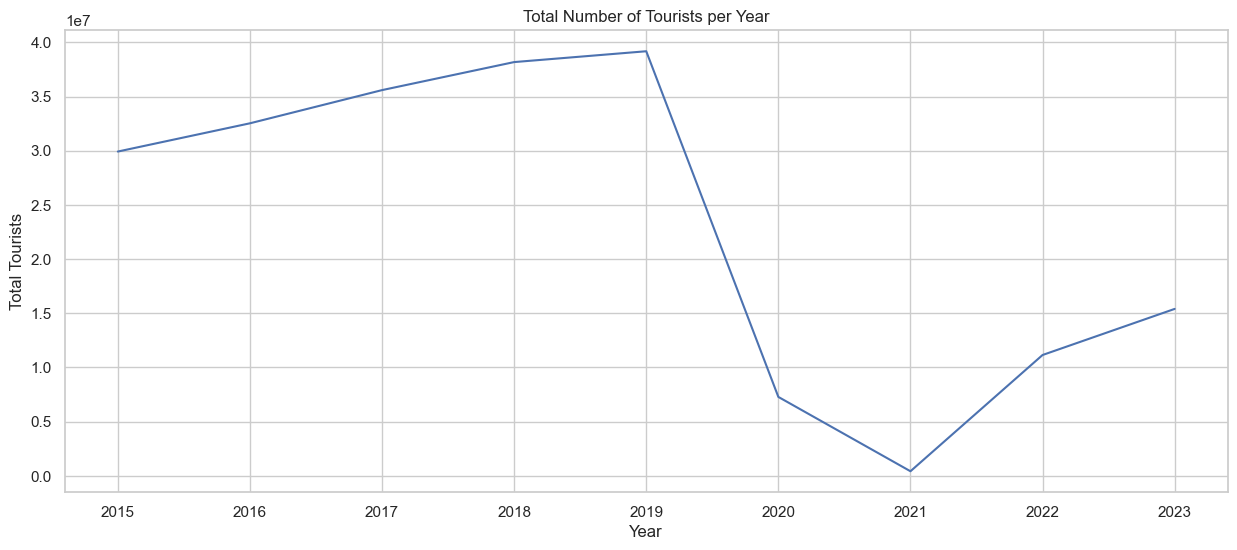

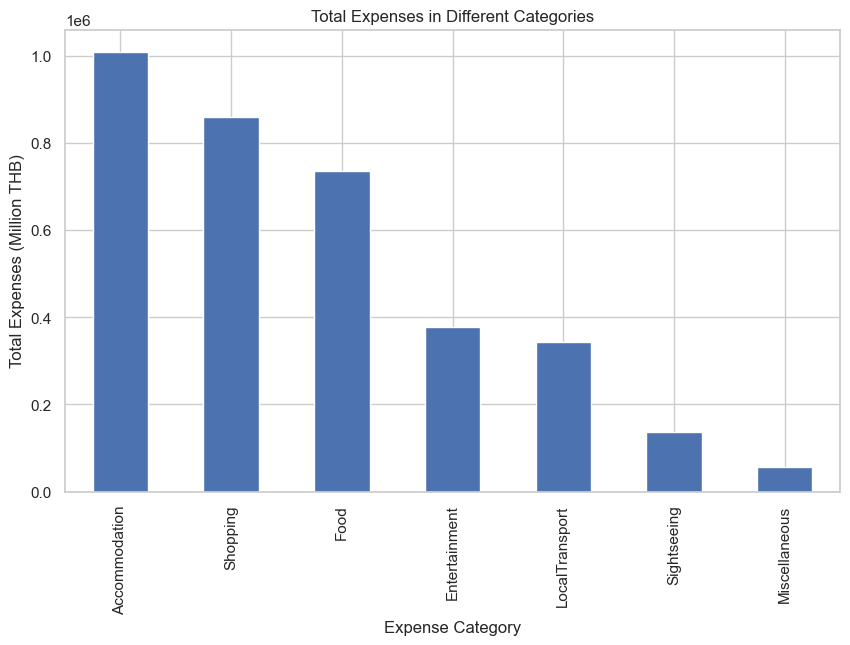

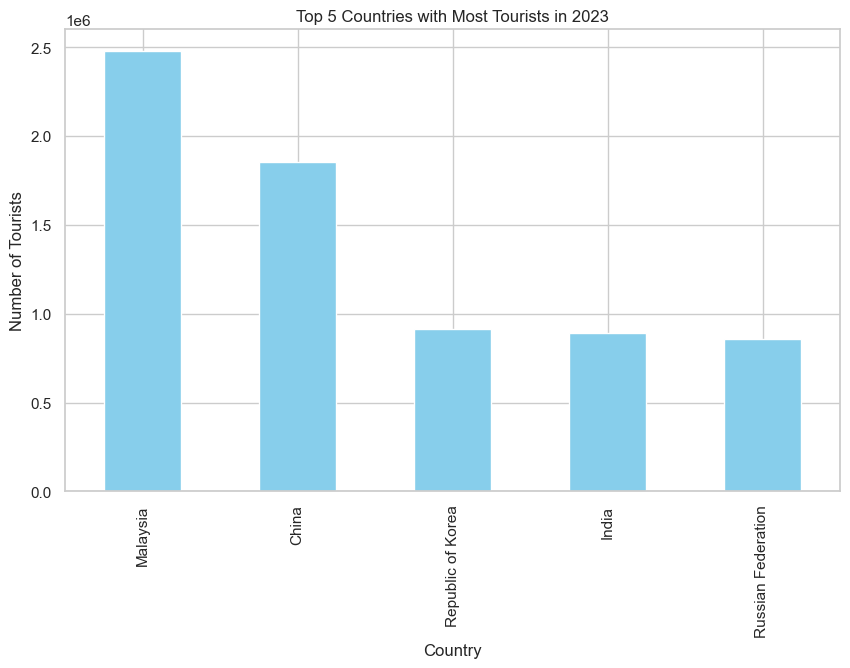

<Figure size 1500x600 with 0 Axes>

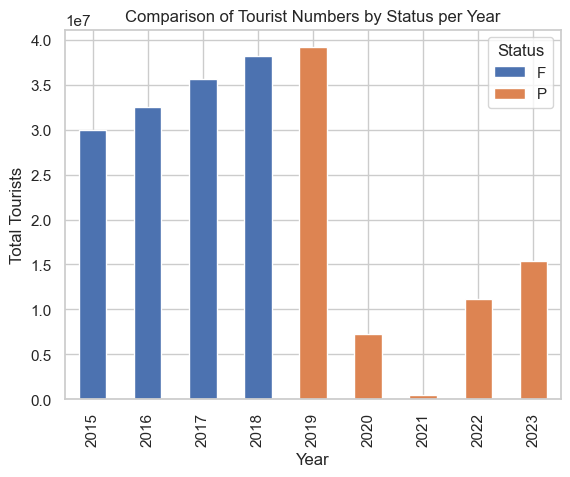

In [3]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Trend Analysis: Tourist numbers over the years
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='YearInfo', y='TouristNumber', estimator='sum', ci=None)
plt.title('Total Number of Tourists per Year')
plt.ylabel('Total Tourists')
plt.xlabel('Year')
plt.show()

# 2. Expenditure Analysis: Total expenses over the years
expense_columns = ['Shopping', 'Entertainment', 'Sightseeing', 'Accommodation', 'Food', 'LocalTransport', 'Miscellaneous']
total_expenses = df[expense_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
total_expenses.plot(kind='bar')
plt.title('Total Expenses in Different Categories')
plt.ylabel('Total Expenses (Million THB)')
plt.xlabel('Expense Category')
plt.show()

# 3. Country-Specific Insights: Top 5 countries with the most tourists in the most recent year
latest_year = df['YearInfo'].max()
top_countries = df[df['YearInfo'] == latest_year].groupby('CountryName')['TouristNumber'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title(f'Top 5 Countries with Most Tourists in {latest_year}')
plt.ylabel('Number of Tourists')
plt.xlabel('Country')
plt.show()

# 4. Comparison of Provisional and Finalized Data (Assuming 'P' is Provisional and 'F' is Finalized)
status_comparison = df.groupby(['YearInfo', 'Status'])['TouristNumber'].sum().unstack().fillna(0)

plt.figure(figsize=(15, 6))
status_comparison.plot(kind='bar', stacked=True)
plt.title('Comparison of Tourist Numbers by Status per Year')
plt.ylabel('Total Tourists')
plt.xlabel('Year')
plt.legend(title='Status')
plt.show()


In [4]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/Users/Vitchakorn/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/Vitchakorn/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


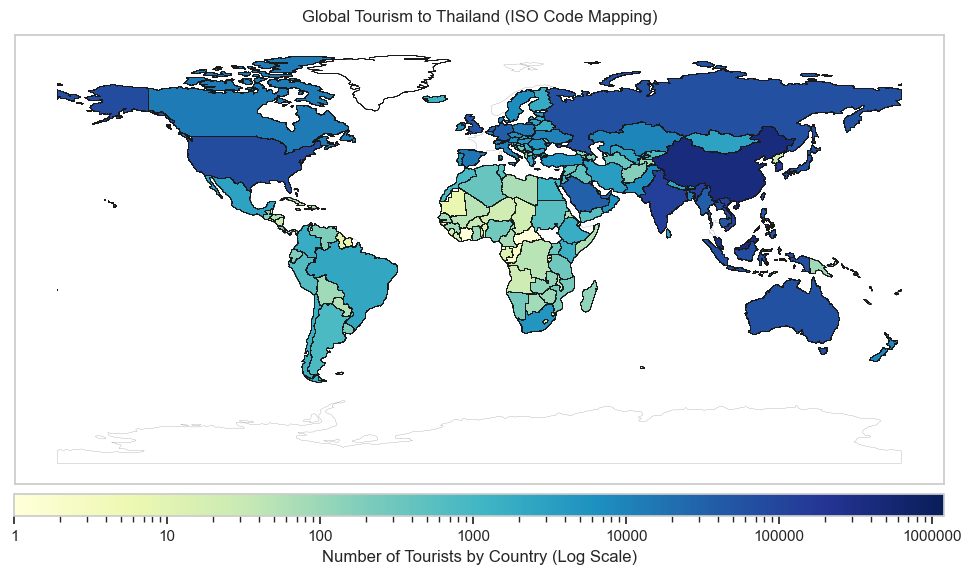

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Merge the tourism data with the world geometry using ISO codes
tourism_map_iso = world.merge(df, how="left", left_on="iso_a3", right_on="ISO")

# Adjust the figure size and plot with a logarithmic color scale
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)  # Reduced size for scale

tourism_map_iso.boundary.plot(ax=ax, linewidth=0.1, color='k')  # Reduced border line width
tourism_map_iso.plot(column='TouristNumber', ax=ax, legend=True,
                     legend_kwds={'label': "Number of Tourists by Country (Log Scale)",
                                  'orientation': "horizontal",
                                  'cax': cax,
                                  'format': "%.0f"},
                     cmap='YlGnBu',
                     edgecolor='k', linewidth=0.1,  # Reduced border line width
                     norm=colors.LogNorm(vmin=df['TouristNumber'].min(), vmax=df['TouristNumber'].max()))

# Remove grid and y-axis numbers
ax.grid(False)
ax.set_xticks([])  # Remove the x-axis numbers
ax.set_yticks([])  # Remove the y-axis numbers

# Move the title to the top of the plot
plt.title('Global Tourism to Thailand (ISO Code Mapping)', pad=340)

plt.show()